<a href="https://colab.research.google.com/github/wdon021/From_Colab/blob/master/FastAI_IE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision feather-format kornia pyarrow Pillow wandb nbdev --upgrade 
!pip install nbdev
!pip install git+https://github.com/fastai/fastcore
!pip install git+https://github.com/fastai/fastprogress  --upgrade

!pip install git+https://github.com/fastai/fastai2

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.4.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.5.0)
Requirement already up-to-date: feather-format in /usr/local/lib/python3.6/dist-packages (0.4.0)
     |████████████████████████████████| 143kB 2.8MB/s 
     |████████████████████████████████| 63.2MB 43kB/s 
     |████████████████████████████████| 2.1MB 45.3MB/s 
     |████████████████████████████████| 1.4MB 54.1MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 460kB 54.9MB/s 
     |████████████████████████████████| 102kB 13.4MB/s 
     |████████████████████████████████| 102kB 13.4MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=2226538ab8d911f2f552b25a2cae77fcc

  Cloning https://github.com/fastai/fastcore to /tmp/pip-req-build-sjrmxm8h
  Running command git clone -q https://github.com/fastai/fastcore /tmp/pip-req-build-sjrmxm8h
  Created wheel for fastcore: filename=fastcore-0.1.15-cp36-none-any.whl size=27529 sha256=7b01e6acd12b63cd96eec498b4ae723c04187e26584cb194b1e5e869c524e293
  Stored in directory: /tmp/pip-ephem-wheel-cache-yo75vgg9/wheels/8a/2a/23/bc50c8f5e28776b44ac837a01fcfa675724565d4813d8e51c7
Successfully built fastcore
  Cloning https://github.com/fastai/fastprogress to /tmp/pip-req-build-95zoihoh
  Running command git clone -q https://github.com/fastai/fastprogress /tmp/pip-req-build-95zoihoh
  Created wheel for fastprogress: filename=fastprogress-0.2.3-cp36-none-any.whl size=12049 sha256=44baf54e4d8ae2c1aa572d71aed59ff2ec8f2e031bba7c189524f5533e7b876d
  Stored in directory: /tmp/pip-ephem-wheel-cache-rgajvtvc/wheels/7a/7b/0d/5fc197867d2d699227020d922bd8ce4b1faa75d188328f6c1c
Successfully built fastprogress
  Found existing inst

In [0]:
import fastai2
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *

In [3]:

# If in colab
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = Path("/content/gdrive/My Drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
path = untar_data(URLs.COCO_SAMPLE)/'train_sample'; path.ls()

(#21837) [Path('/root/.fastai/data/coco_sample/train_sample/000000579215.jpg'),Path('/root/.fastai/data/coco_sample/train_sample/000000531721.jpg'),Path('/root/.fastai/data/coco_sample/train_sample/000000394214.jpg'),Path('/root/.fastai/data/coco_sample/train_sample/000000081315.jpg'),Path('/root/.fastai/data/coco_sample/train_sample/000000136245.jpg'),Path('/root/.fastai/data/coco_sample/train_sample/000000428576.jpg'),Path('/root/.fastai/data/coco_sample/train_sample/000000067057.jpg'),Path('/root/.fastai/data/coco_sample/train_sample/000000153036.jpg'),Path('/root/.fastai/data/coco_sample/train_sample/000000254787.jpg'),Path('/root/.fastai/data/coco_sample/train_sample/000000212939.jpg')...]

In [0]:
bs,sz = 22,256

In [0]:
dblock = DataBlock(blocks=(ImageBlock, ImageBlock),
                   get_items=lambda *a, **kw: get_image_files(*a, **kw),
                   splitter=RandomSplitter(0.1, seed=42),
                   get_y=lambda x: x,
                   item_tfms=[Resize(sz)],
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)],
                 )

In [0]:
dbch = dblock.dataloaders(path,bs=bs)

In [0]:
 dbch.c =3

In [0]:
xb, yb= dbch.one_batch()

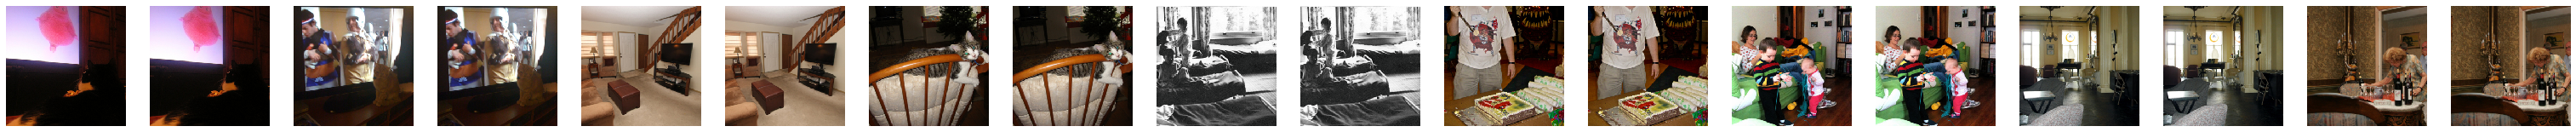

In [18]:
dbch.show_batch(rows=1)

In [19]:
!wget https://static.greatbigcanvas.com/images/singlecanvas_thick_none/megan-aroon-duncanson/little-village-abstract-art-house-painting,1162125.jpg -O style.jpg


--2020-02-29 08:50:25--  https://static.greatbigcanvas.com/images/singlecanvas_thick_none/megan-aroon-duncanson/little-village-abstract-art-house-painting,1162125.jpg
Resolving static.greatbigcanvas.com (static.greatbigcanvas.com)... 3.212.96.207, 52.73.94.154
Connecting to static.greatbigcanvas.com (static.greatbigcanvas.com)|3.212.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445921 (435K) [image/jpeg]
Saving to: ‘style.jpg’

style.jpg           100%[===================>] 435.47K  --.-KB/s    in 0.04s   

2020-02-29 08:50:26 (9.97 MB/s) - ‘style.jpg’ saved [445921/445921]



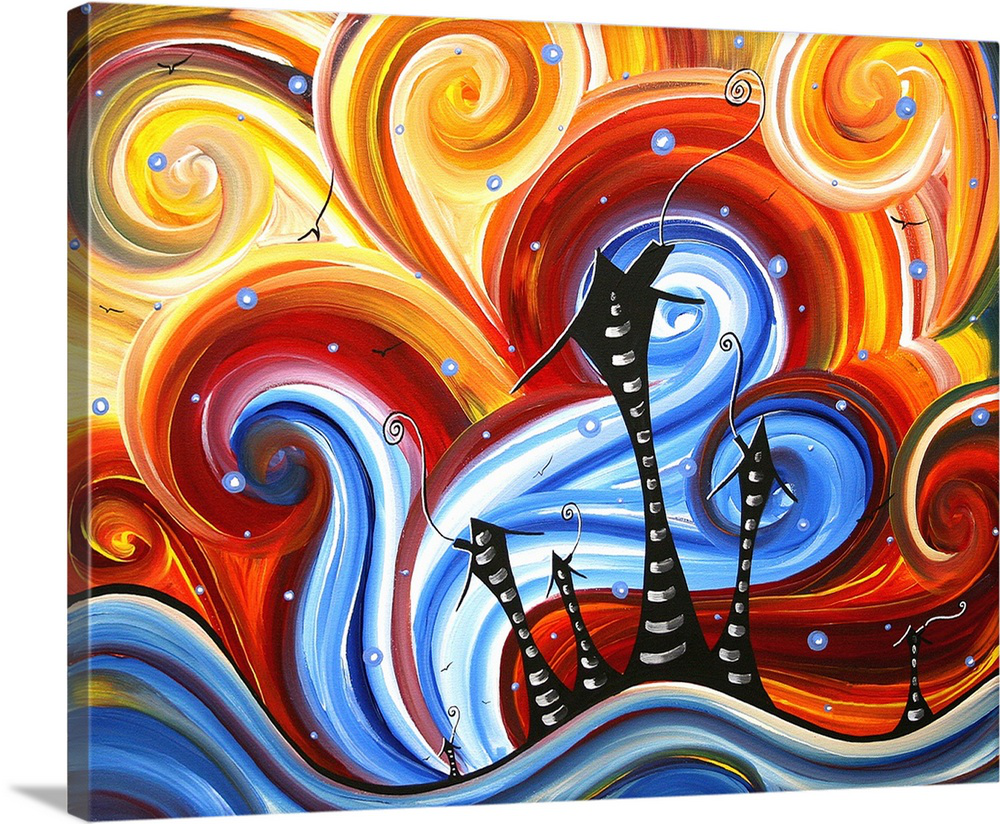

In [20]:
fn = 'style.jpg'
pipe = Pipeline([PILImage.create, ToTensor(), IntToFloatTensor(), Normalize.from_stats(*imagenet_stats, cuda=False)])
style_timg = TensorImage(pipe(fn).cuda());
PILImage.create(fn)

In [0]:

def gram(x):
    n,c,h,w = x.size()
    x = x.view(n, c, -1)
    return (x @ x.transpose(1,2))/(c*h*w)

In [22]:
!wget https://raw.githubusercontent.com/pytorch/examples/master/fast_neural_style/neural_style/transformer_net.py -O transformer_net.py
from transformer_net import TransformerNet
from torchvision.models import vgg16, vgg19

--2020-02-29 08:52:27--  https://raw.githubusercontent.com/pytorch/examples/master/fast_neural_style/neural_style/transformer_net.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3782 (3.7K) [text/plain]
Saving to: ‘transformer_net.py’

transformer_net.py  100%[===================>]   3.69K  --.-KB/s    in 0s      

2020-02-29 08:52:28 (89.5 MB/s) - ‘transformer_net.py’ saved [3782/3782]



In [23]:
feat_m = vgg19(True).features.cuda().eval() #download vgg again?
for p in feat_m.parameters(): p.requires_grad=False
requires_grad(feat_m)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth


False

In [24]:
layers = [feat_m[i] for i in [1, 6, 11, 20, 29, 22]]; layers

[ReLU(inplace=True),
 ReLU(inplace=True),
 ReLU(inplace=True),
 ReLU(inplace=True),
 ReLU(inplace=True),
 ReLU(inplace=True)]

In [0]:
def VggFeats(layers):
  hooks = hook_outputs(layers, detach=False)
  def _inner(x):
    feat_m(x)
    return hooks.stored
  return _inner

In [0]:
get_fs = VggFeats(layers)

In [0]:
def cnt_loss_fn(fs, y_fs): return F.mse_loss(fs[-1], y_fs[-1])

In [0]:
def get_stl_fs(fs): return fs[:-1]

stl_fs = get_fs(style_timg)
stl_grams = [gram(f) for f in stl_fs]
def stl_loss_fn(fs, y_fs):
  bs = fs[0].shape[0]
  stl_losses = [F.mse_loss(y_gram.repeat(bs,1,1),gram(f)) for y_gram,f in zip(*map(get_stl_fs, [stl_grams, fs]))]
  return 3e5*sum(stl_losses)

In [0]:
def tv_loss_fn(img):      
  tv_h = ((img[:,:,1:,:] - img[:,:,:-1,:]).pow(2)).mean()
  tv_w = ((img[:,:,:,1:] - img[:,:,:,:-1]).pow(2)).mean()    
  return 10*(tv_h + tv_w)

In [0]:
class FSTLoss(Module): #combined Loss
  def __init__(self, get_fs, stl_loss_fn, cnt_loss_fn, tv_loss_fn):
    super().__init__()
    store_attr(self, 'get_fs,stl_loss_fn,cnt_loss_fn,tv_loss_fn')
    self.reset_metrics()

  def forward(self, pred, targ, **kwargs):
    pred_feats,targ_feats = self.get_fs(pred),self.get_fs(targ)
    assert not (pred_feats[0] == targ_feats[0]).all()
    stl_loss = self.stl_loss_fn(pred_feats, targ_feats)
    cnt_loss = self.cnt_loss_fn(pred_feats, targ_feats)
    tv_loss  = self.tv_loss_fn (pred)
    self._add_loss(stl_loss, cnt_loss, tv_loss)
    return stl_loss+cnt_loss+tv_loss
  
  def reset_metrics(self): self.metrics = dict(style=[], content=[], tv=[])
    
  def _add_loss(self, stl_loss, cnt_loss, tv):
     self.metrics['style'].append(stl_loss),self.metrics['content'].append(cnt_loss),self.metrics['tv'].append(tv)

In [0]:
loss_func = FSTLoss(get_fs, stl_loss_fn, cnt_loss_fn, tv_loss_fn)

In [0]:
opt_func = lambda ps, lr, **kwargs: Adam(ps, lr, **kwargs) #optimization function

In [0]:
m = TransformerNet().cuda()

In [0]:
learn = Learner(dbch, m, loss_func=loss_func, opt_func=opt_func)

In [35]:
learn.path = root_dir/'dl/style'; learn.path

Path('/content/gdrive/My Drive/dl/style')

(0.00036307806149125097, 0.0014454397605732083)

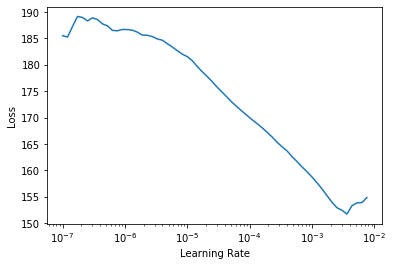

In [42]:

learn.lr_find()

In [43]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,time
0,26.643719,26.686609,19:01


In [0]:
learn.save('tn-vgg19-village-512_1')

In [0]:
learn.save('/content/gdrive/My Drive/dl/style/tn-vgg19-village-512_1')

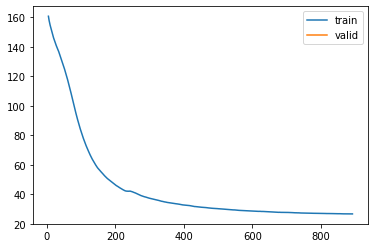

In [46]:

learn.recorder.plot_loss()

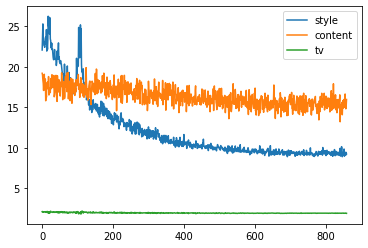

In [47]:
for k, v in loss_func.metrics.items(): plt.plot(v[200:], label=k)
plt.legend()

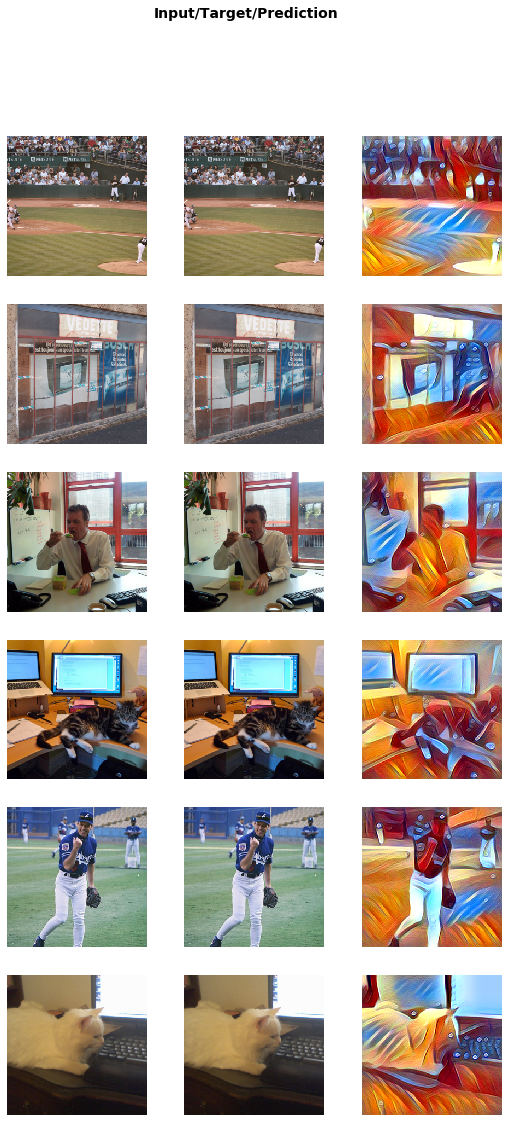

In [48]:

learn.show_results()